# (Assignment 5) Grid Pattern Finding: Polynomials & Primes

In [4]:
#Polynomial Generator based on diagonal/vertical/horizontal values
from sympy import symbols, expand
from sympy.polys.specialpolys import interpolating_poly

# Define the symbol
x = symbols('x')

# Example set of X and Y values
X = [1, 2, 3, 4, 5]
Y = [3, 7, 13, 21, 31]

# Generate the interpolating polynomial for the given set of X and Y values
poly = interpolating_poly(len(X), x, X, Y)

# Expand the polynomial
expanded_poly = expand(poly)

# Show the expanded polynomial
expanded_poly


x**2 + x + 1

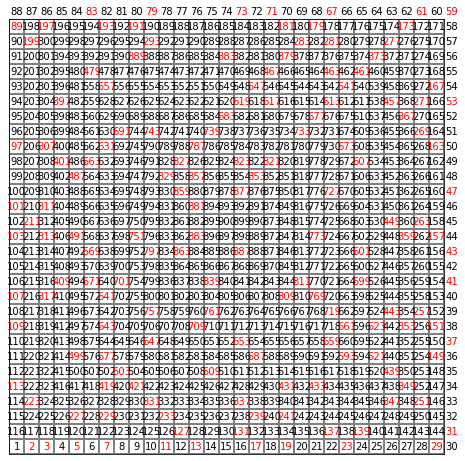

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def is_prime(num):
    """
    Check if a number is prime.
    """
    if num < 2:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

def create_zigzag_pattern(n):
    """
    Create an nxn grid with a zigzag pattern and return both the grid
    and the indices of prime numbers within the grid.
    """
    # Initialize the grid with zeros
    grid = np.zeros((n, n), dtype=int)

    # Starting point
    number = 1
    for layer in range((n+1)//2):  # for each concentric square or layer
        # Top row (left to right)
        for i in range(layer, n-layer):
            grid[layer, i] = number
            number += 1

        # Right column (top to bottom)
        for i in range(layer + 1, n - layer):
            grid[i, n - layer - 1] = number
            number += 1

        # Bottom row (right to left)
        for i in range(n - layer - 2, layer - 1, -1):
            grid[n - layer - 1, i] = number
            number += 1

        # Left column (bottom to top)
        for i in range(n - layer - 2, layer, -1):
            grid[i, layer] = number
            number += 1

    # Find the prime numbers
    primes_indices = [(i, j) for i in range(n) for j in range(n) if is_prime(grid[i, j])]
    return grid, primes_indices

# Example: Create a 5x5 grid
grid_size = 30
grid, primes_indices = create_zigzag_pattern(grid_size)

# Plot the grid
fig, ax = plt.subplots(figsize=(8, 8))

# Use a text annotation in the center of each cell to represent the number
for (i, j), val in np.ndenumerate(grid):
    color = 'red' if (i, j) in primes_indices else 'black'
    ax.text(j, i, str(val), va='center', ha='center', color=color)

# Set the ticks to be at the center of each cell
ax.set_xticks(np.arange(grid_size) - 0.5, minor=True)
ax.set_yticks(np.arange(grid_size) - 0.5, minor=True)

# Gridlines based on minor ticks
ax.grid(which="minor", color="gray", linestyle='-', linewidth=2)
ax.tick_params(which="minor", size=0)

# Hide the major tick labels
ax.tick_params(which="major", bottom=False, left=False, labelbottom=False, labelleft=False)

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Set the plot title
#ax.set_title('n x n Grid with Prime Numbers Highlighted', fontsize=16)

# Show the plot
plt.show()


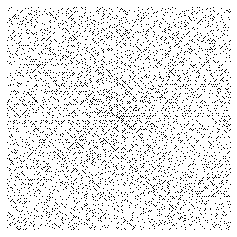

In [6]:
# Python code to print Ulam's spiral (Source: GeeksforGeeks)
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 

# function to plot out the ulam spiral 
def make_spiral(arr): 
	nrows, ncols= arr.shape 
	idx = np.arange(nrows*ncols).reshape(nrows,ncols)[::-1] 
	spiral_idx = [] 
	while idx.size: 
		spiral_idx.append(idx[0]) 

		# Remove the first row (the one we've 
		# just appended to spiral). 
		idx = idx[1:] 

		# Rotate the rest of the array anticlockwise 
		idx = idx.T[::-1] 

	# Make a flat array of indices spiralling 
	# into the array. 
	spiral_idx = np.hstack(spiral_idx) 

	# Index into a flattened version of our 
	# target array with spiral indices. 
	spiral = np.empty_like(arr) 
	spiral.flat[spiral_idx] = arr.flat[::-1] 
	return spiral 

# edge size of the square array. 
w = 251
# Prime numbers up to and including w**2. 
primes = np.array([n for n in range(2,w**2+1) if all( 
						(n % m) != 0 for m in range(2,int(np.sqrt(n))+1))]) 

# Create an array of boolean values: 1 for prime, 0 for composite 
arr = np.zeros(w**2, dtype='u1') 
arr[primes-1] = 1

# Spiral the values clockwise out from the centre 
arr = make_spiral(arr.reshape((w,w))) 

plt.matshow(arr, cmap=cm.binary) 
plt.axis('off') 
plt.show() 
